<a href="https://colab.research.google.com/github/Ozioma606/Recognition-System-/blob/main/Titanic_Prediction_Survival_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Dependecies

Saving train.csv to train (2).csv
Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       104
           1       0.74      0.73      0.74        75

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



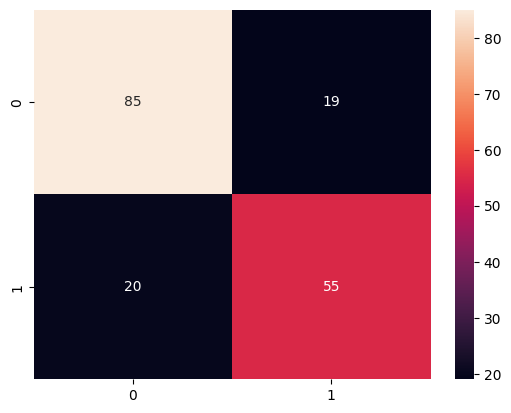

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Params: {'C': 0.1, 'max_iter': 100}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['titanic_prediction_model.pkl']

In [15]:
!pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('/content/train.csv')
df.head()
df.isnull().sum()

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    # split data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   # Fit only on training data
X_test_scaled = scaler.transform(X_test)         # Transform test data
from sklearn.linear_model import LogisticRegression        # Train the model
model = LogisticRegression(max_iter=2000, solver='liblinear')
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)                # Make predictions
print("Accuracy:", accuracy_score(y_test, y_pred)) # Evaluate
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 1, 10], 'max_iter': [100, 200]}
grid = GridSearchCV(LogisticRegression(), params, cv=5)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

import joblib
joblib.dump(model, 'titanic_prediction_model.pkl')
